In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data_Science_Fields_Salary_Categorization.csv')

In [3]:
df.head()

,work_year,Experience,Employment_Status,Designation,Salary,salary_currency,Salary_In_Rupees,employee_residence,Remote_Working_Ratio,Company_Location,Company_Size
0,2022,EN,FT,Data Analytics Engineer,13000,USD,13000,AR,100,AR,S
1,2022,SE,FT,Data Engineer,100000,USD,100000,US,0,US,M
2,2022,SE,FT,Data Engineer,78000,USD,78000,US,0,US,M
3,2022,SE,FT,Data Engineer,120000,USD,120000,US,0,US,M
4,2022,SE,FT,Data Engineer,95000,USD,95000,US,0,US,M


In [4]:
df.dtypes

work_year                int64
Experience              object
Employment_Status       object
Designation             object
Salary                   int64
salary_currency         object
Salary_In_Rupees         int64
employee_residence      object
Remote_Working_Ratio     int64
Company_Location        object
Company_Size            object
dtype: object

In [5]:
def valStrInt(a):
    try:
        if type(a) == type(str()):
            a = a.split('.')
            a = a[0].split(',')  
            return int(''.join(a))
    except Exception as e:
        return e
    
valStrInt('6,43,000')

643000

In [6]:
df_sal = df['Salary_In_Rupees'].apply(valStrInt)
df_sal

0       None
1       None
2       None
3       None
4       None
        ... 
1632    None
1633    None
1634    None
1635    None
1636    None
Name: Salary_In_Rupees, Length: 1637, dtype: object

In [7]:
df['Salary'] = df_sal

In [8]:
df.shape

(1637, 11)

In [9]:
#dropping column Unnamed: 0. 
"""Uncomment if Starting again"""
df.drop('Unnamed: 0', axis='columns', inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [111]:
# different types of roles in DataScience
df.Designation.unique()

array(['Data Analytics Engineer', 'Data Engineer', 'Data Specialist',
       'Data Analytics Consultant', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Machine Learning Software Engineer',
       '3D Computer Vision Researcher', 'ML Engineer',
       'Machine Learning Researcher', 'Data Architect',
       'Research Engineer', 'Machine Learning Research Engineer',
       'Analytics Engineer', 'Data Analytics Manager',
       'Data Science Consultant', 'Deep Learning Engineer',
       'BI Data Analyst', 'Data Science Manager', 'Applied Scientist',
       'Data Management Specialist', 'Research Scientist',
       'Autonomous Vehicle Technician', 'Data Science Tech Lead',
       'BI Analyst', 'Machine Learning Developer',
       'Machine Learning Scientist', 'Data Scientist Lead',
       'Data Manager', 'Cloud Data Engineer', 'Head of Data',
       'Data Operations Analyst', 'Data Operations Engineer',
       'Marketing Data Analyst', 'Data Science Lead',
       'P

In [112]:
# Number of job roles
len(df.Designation.unique())

70

In [113]:
df_designation = df[['Designation', df.columns[0]]].groupby('Designation').count()

In [114]:
df_designation.rename(columns={df.columns[0]: 'Number of jobs'}, inplace=True)

In [115]:
df_designation = df_designation.sort_values(by='Number of jobs', ascending=False)
df_designation.head()

,Number of jobs
Designation,
Data Engineer,429
Data Scientist,401
Data Analyst,249
Machine Learning Engineer,106
Analytics Engineer,53


In [116]:
# Different kinds of company sizes
df.Company_Size.unique()

array(['S', 'M', 'L'], dtype=object)

In [117]:
# Experience Levels
df.Experience.unique()

array(['EN', 'SE', 'MI', 'EX'], dtype=object)

In [118]:
df_companyLoc = df[['Company_Location', 'Experience']].groupby('Company_Location').count().sort_values(by='Experience', ascending=False)
df_companyLoc = df_companyLoc.rename(columns={'Experience': 'Number of Jobs'})
df_companyLoc.head()

,Number of Jobs
Company_Location,
US,1202
GB,97
CA,46
DE,40
ES,39


In [119]:
# Jobs with experience that are 100% remote and Salary greaterthan or equal to median
df_medianPay = df[(df['Salary'] >= np.median(df['Salary'])) & (df['Remote_Working_Ratio']==100)]
df_medianPay[['Experience', 'Salary']].groupby('Experience').count().rename(columns={'Salary': 'No_of_positions'})

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [19]:
df_medianPay[['Designation', 'Salary']].groupby('Designation').count().rename(columns={'Salary': 'No_of_positions'}).sort_values('No_of_positions', ascending=False)

,No_of_positions
Designation,
Data Engineer,56
Data Scientist,49
Data Analyst,33
Data Architect,10
Data Science Manager,9
Machine Learning Engineer,9
Principal Data Scientist,6
Data Analytics Manager,6
Machine Learning Scientist,4


In [20]:
# highpaid job
df[df['Salary'] == max(df['Salary'])]

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary
252,2021,Principal Data Engineer,EX,FT,"47,741,700.00",US,US,L,100,47741700


In [21]:
# Entery level/ Junior jobs that are remort and paying morethan median in Large Companies
df[(df['Experience'] == 'EN') & (df['Remote_Working_Ratio']==100) & (df['Company_Size']=='L') &(df['Salary'] >= np.median(df['Salary']))][['Designation', 'Company_Location']]

,Designation,Company_Location
115,Machine Learning Scientist,US
508,Research Scientist,US


In [22]:
# Entry Level fulltime jobs that are partially remote in US
df[(df['Experience'] == 'EN') & (df['Remote_Working_Ratio'] == 50) & (df['Employment_Status'] == 'FT') & (df['Company_Location']=='US')][['Designation', 'Salary']].groupby('Designation').count().rename(columns={'Salary': 'No_of_positions'}).sort_values('No_of_positions', ascending=False)

,No_of_positions
Designation,
Machine Learning Engineer,2
BI Data Analyst,1
Data Scientist,1
Financial Data Analyst,1


In [27]:
# FullTime vs PartTime jobs
df_fulltimevsParttime = df[['Employment_Status', 'Salary']].groupby('Employment_Status').count().rename(columns={'Salary': 'No_of_jobs'})
df_fulltimevsParttime.head()

,No_of_jobs
Employment_Status,
CT,5
FL,4
FT,588
PT,10


In [46]:
df_fulltimevsParttime[df_fulltimevsParttime.columns[1]] = df_fulltimevsParttime[df_fulltimevsParttime.columns[1]].apply(lambda a: int(a))
df_fulltimevsParttime[df_fulltimevsParttime.columns[0]] = df_fulltimevsParttime[df_fulltimevsParttime.columns[0]].apply(lambda a: str(a))

df_fulltimevsParttime.head()

,Employment_Status,No_of_jobs
0,CT,5
1,FL,4
2,FT,588
3,PT,10


In [47]:
df_fulltimevsParttime.dtypes

Employment_Status    object
No_of_jobs            int64
dtype: object

In [34]:
# df_fulltimevsParttime.reset_index(inplace=True)

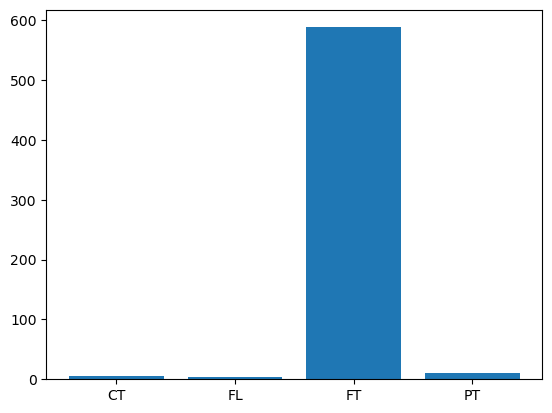

In [49]:
plt.bar(df_fulltimevsParttime[df_fulltimevsParttime.columns[0]],df_fulltimevsParttime[df_fulltimevsParttime.columns[1]])
plt.show()

In [24]:
df[(df['Employment_Status']=='CT')]

,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary
28,2020,Business Data Analyst,EN,CT,"7,956,950.00",US,US,L,100,7956950
78,2021,ML Engineer,MI,CT,"21,483,765.00",US,US,L,100,21483765
225,2021,Principal Data Scientist,EX,CT,"33,100,912.00",US,US,S,100,33100912
283,2021,Staff Data Scientist,SE,CT,"8,354,798.00",US,US,M,100,8354798
489,2022,Applied Machine Learning Scientist,EN,CT,"2,536,278.00",TN,CZ,M,100,2536278
